# Classification Based Machine Learning Algorithm

[An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)

## Scikit-learn Definition:

**Supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

* **Classification**: samples belong to two or more *classes* and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.


* **Regression**: if the desired output consists of one or more *continuous variables*, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

MNIST dataset - a set of 70,000 small images of digits handwritten. You can read more via [The MNIST Database](http://yann.lecun.com/exdb/mnist/)

## Downloading the MNIST dataset

In [2]:
import numpy as np

In [17]:
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
#mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784',version=1, cache=True)

In [18]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [19]:
len(mnist['data'])

70000

### Vizualization

In [20]:
X, y = mnist['data'], mnist['target']

In [21]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
y[69999]

'6'

In [30]:
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

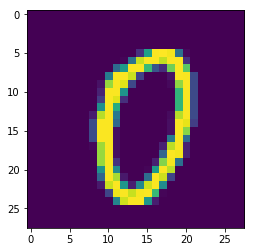

In [33]:
_ = X[1000]
_image = _.reshape(28, 28)
plt.imshow(_image);

In [34]:
y[1000]

'0'

### Exercise: Locating the number 6 and plot the image

In [35]:
type(y)

numpy.ndarray

In [36]:
y == 6

array([False, False, False, ..., False, False, False])

In [69]:
np.where(y==6)

(array([], dtype=int64),)

In [70]:
y[24754]

'6'

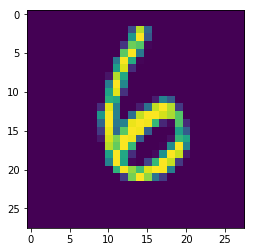

In [71]:
_ = X[24754]
_image = _.reshape(28, 28)
plt.imshow(_image); 

## Splitting the train and test sets

In [81]:
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

**Tips**: Typically we shuffle the training set. This ensures the training set is randomised and your data distribution is consistent. However, shuffling is a bad idea for time series data.

### Shuffling the dataset

[Alternative Method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

In [82]:
import numpy as np

In [83]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier
To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two-class problem.

We need to first convert our target to 0 or non zero.

In [126]:
y_train_0 = (y_train == '0')

In [127]:
y_train_0

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True,

In [125]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
y_train[0]
#y_train_0[:1100]
#y_train.size
#y_train_0.size

'7'

In [130]:
y_test_0 = (y_test == '0')

In [131]:
y_test_0

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

At this point we can pick any classifier and train it. This is the iterative part of choosing and testing all the classifiers and tuning the hyper parameters

---

## SGDClassifier

User for **SVM** or **Logistic Regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://scikit-learn.org/stable/modules/sgd.html

### Training

In [132]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Prediction

In [137]:
# failed prediction
clf.predict(X[1000].reshape(1, -1))

array([ True])

In [138]:
y_train[1000]

'7'

In [139]:
y_train_0[1000]

False

## Performance Measures

### Measuring Accuracy Using Cross-Validation

### StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

In [141]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [142]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [147]:

# 3 folds, at each iteration 1 used for train and other 2 used for test
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9896


/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9819


/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9877


#### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([0.98955052, 0.98195   , 0.98774939])